

# PROJECT 2: Investing in Green Stocks (Materials and Financial Sectors)
**OPIM 5641: Business Decision Modeling - University of Connecticut**

---------------------------------------------------------------------------

Team 8 members and their contributions:
* ***Ziru Hu*** - Lead coder
* ***Daniel Jackson*** - Assembled notebook and edited coding
* ***Javier Blas*** - Created video and reviewed notebook
* ***Andrew Joseph*** - Led the data gathering/wrangling effort

<br />

**Introduction:** 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In this project, your team will create an investment plan for investors interested in the stock market.  Your team will allocate investors' money across the top green and dirty stocks within the Financial and Materials sectors in order to maximize returns on investor capital while accounting for the risk tolerance.


## Load modules and mount Google drive

In [ ]:
# Loading Pandas, NumPy, Matplotlib, Seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Loading Pyomo and IPOPT solver 

!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' 
except:
    pass

## Read in Financial and Materials sector stocks with thie green scores

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Business Decision Modeling/Project 2/GreenStocks_Materials_and_Financials.csv')

In [ ]:
print (np.shape (df)) # Getting a feel for the shape of the data

(91, 4)


In [ ]:
# Taking a look at the top 5 rows to ensure we have the correct dataset
df.head()

,Financials sector,Symbol,Name,Green Score(%)
0,Financial,AON,AON Plc,NaN
1,Financial,CB,Chubb Ltd,NaN
2,Financial,CBOE,CBOE Global Markets Inc,NaN
3,Financial,CMA,Comerica Inc,NaN
4,Financial,CME,CME Group Inc,NaN


In [ ]:
# Adding a column called "Dirty Score" to the dataframe for future use
df['Dirty Score']=''

In [ ]:
# Checking our work
df.head()

,Financials sector,Symbol,Name,Green Score(%),Dirty Score
0,Financial,AON,AON Plc,NaN,
1,Financial,CB,Chubb Ltd,NaN,
2,Financial,CBOE,CBOE Global Markets Inc,NaN,
3,Financial,CMA,Comerica Inc,NaN,
4,Financial,CME,CME Group Inc,NaN,


In [ ]:
# Listing the columns of the dataframe
df.columns

Index(['Financials sector', 'Symbol', 'Name', 'Green Score(%)', 'Dirty Score'], dtype='object')

# Plot & Table based on green score


## Plot - Categorical Scatterplot

In [ ]:
# Calculating the average green score to include in plot
print("Average Green Score % : " , round(np.mean(df['Green Score(%)']) , 0))

Average Green Score % :  29.0


Text(0.5, 1.0, 'Green Score per Stock Sector')

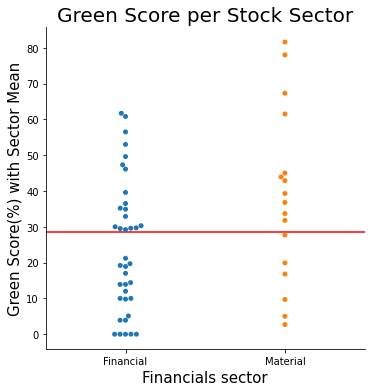

In [ ]:
# Using a categorical scatterplot for a better visualization
plot=sns.catplot(x='Financials sector', y='Green Score(%)', kind='swarm', data=df) # Using swarm to better see the dots at the same levels

# Laying in the median of the entire basket of stocks
plt.axhline(np.mean(df['Green Score(%)']), color='red')  # Showing the mean on the plot

# Increasing the size of the labels
plt.xlabel('Financials sector', size=15)
plt.ylabel('Green Score(%) with Sector Mean', size=15)

# Adding a title 
plt.title('Green Score per Stock Sector', size =20)


### Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The scatterplot shows that the majority of the Financial sector stocks are well below or near the average green score.  However, the majority of the Materials sector stocks are above the average with the top 4 green stocks in the Materials sector.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;It is clear to see that the Materials sector is "greener" than the Financial sector.

## Table - Top 10 and bottom 10 stocks based on green scores

In [ ]:
# Sorting by green score and ordering top to bottom
topgreen = df.sort_values('Green Score(%)',ascending=False).head(10)
topgreen

,Financials sector,Symbol,Name,Green Score(%),Dirty Score
36,Material,ECL,Ecolab Inc,81.6,
37,Material,SEE,Sealed Air Corp,78.0,
38,Material,BLL,Ball Corp,67.3,
39,Financial,MET,Metlife Inc,61.7,
40,Material,PPG,PPG Industries,61.5,
41,Financial,AFL,Aflac Inc,60.8,
42,Financial,PRU,Prudential Financial Inc,56.5,
43,Financial,C,Citigroup Inc,53.0,
44,Financial,STT,State Street Corp,49.6,
45,Financial,GS,Goldman Sachs Group,47.3,


In [ ]:
# Using the previously added "Dirty Score" column to label the top 10 clean stocks
topgreen.loc[df['Symbol'].isin(topgreen['Symbol']),'Dirty Score'] = 'Top 10 Clean'

In [ ]:
# Sorting by green score and ordering bottom to top
bottomgreen = df.sort_values('Green Score(%)',ascending=True).head(10)
bottomgreen

,Financials sector,Symbol,Name,Green Score(%),Dirty Score
90,Financial,SYF,Synchrony Financial,0.0,
86,Financial,AMP,Ameriprise Financial Services,0.0,
89,Financial,RJF,Raymond James Financial,0.0,
88,Financial,DFS,Discover Financial Services,0.0,
87,Financial,CFG,Citizens Financial Group Inc/Ri,0.0,
85,Material,PKG,Packaging Corp of America,2.7,
84,Financial,CINF,Cincinnati Financial,3.9,
83,Financial,AIZ,Assurant Inc,3.9,
82,Material,CE,Celanese Corp,5.0,
81,Financial,RF,Regions Financial Corp,5.1,


In [ ]:
# Using the previously added "Dirty Score" column to label the top 10 dirty stocks
bottomgreen.loc[df['Symbol'].isin(bottomgreen['Symbol']),'Dirty Score'] = 'Bottom 10 Clean'

In [ ]:
# Combining the top and bottom 10 stocks based on green score
top_n_bottom = pd.concat([topgreen,bottomgreen])

In [ ]:
# Displaying table containing top and bottom 10 stocks based on green score
top_n_bottom

,Financials sector,Symbol,Name,Green Score(%),Dirty Score
36,Material,ECL,Ecolab Inc,81.6,Top 10 Clean
37,Material,SEE,Sealed Air Corp,78.0,Top 10 Clean
38,Material,BLL,Ball Corp,67.3,Top 10 Clean
39,Financial,MET,Metlife Inc,61.7,Top 10 Clean
40,Material,PPG,PPG Industries,61.5,Top 10 Clean
41,Financial,AFL,Aflac Inc,60.8,Top 10 Clean
42,Financial,PRU,Prudential Financial Inc,56.5,Top 10 Clean
43,Financial,C,Citigroup Inc,53.0,Top 10 Clean
44,Financial,STT,State Street Corp,49.6,Top 10 Clean
45,Financial,GS,Goldman Sachs Group,47.3,Top 10 Clean


### Conclusion

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The table shows that 8 of the bottom green stocks are from the Financial sector, whereas only 6 are in the top 10.  Therefore the Financial sector is not as clean as the Materials sector.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The table makes it easy to see some of the greenest stocks like Ecolab Inc., Sealed Air Corp and Ball Corp.  It is also easy to see the least green stocks such as Westrock Company and Ameriprise Financial Service.

# Model 1 - Top 10 green stocks

## Load stock market packages

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

## Retrieve historical pricing data

In [ ]:
# Assign top 10 green stocks to a list
tickers_list = topgreen['Symbol'].tolist()
tickers_list

['ECL', 'SEE', 'BLL', 'MET', 'PPG', 'AFL', 'PRU', 'C', 'STT', 'GS']

In [ ]:
# Pull historical pricing data (05/01/2020 to 12/31/2020) for stocks in our top 10 list
dow_prices = {ticker : si.get_data(ticker,start_date = '05/01/2020',end_date='12/31/2020',interval='1d') for ticker in tickers_list}
dow_prices

{'AFL':                  open       high        low  ...   adjclose   volume  ticker
 2020-05-01  36.290001  36.630001  35.970001  ...  35.567970  3425200     AFL
 2020-05-04  36.049999  36.099998  35.150002  ...  34.722961  3522700     AFL
 2020-05-05  35.860001  36.639999  35.860001  ...  34.888081  3421600     AFL
 2020-05-06  35.529999  35.970001  34.279999  ...  33.295189  4079500     AFL
 2020-05-07  34.869999  36.459999  34.840000  ...  34.839512  2977600     AFL
 ...               ...        ...        ...  ...        ...      ...     ...
 2020-12-23  43.419998  43.900002  43.139999  ...  43.223843  5450700     AFL
 2020-12-24  43.669998  43.930000  43.380001  ...  43.531662  1383500     AFL
 2020-12-28  44.080002  44.750000  43.910000  ...  43.611099  2282700     AFL
 2020-12-29  44.160000  44.320000  43.700001  ...  43.442295  2386700     AFL
 2020-12-30  43.869999  44.480000  43.830002  ...  43.700466  1954500     AFL
 
 [169 rows x 7 columns],
 'BLL':                  open 

In [ ]:
# Extract just the data we need (adjclose)
# Getting the adjclose price for ticker ECL
prep_data = pd.DataFrame(dow_prices['ECL']['adjclose']).rename(columns = {"adjclose":"ECL"})

In [ ]:
# Combine all 10 tickers
for i in tickers_list[0:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,STT,GS
2020-05-01,188.292618,27.776352,65.132980,33.059090,86.397537,35.567970,55.815361,44.135750,57.307976,173.311523
2020-05-04,189.798965,26.782228,65.669060,32.582455,85.248840,34.722961,55.196648,43.747913,56.648369,172.264435
2020-05-05,191.582794,28.760632,65.778267,32.668251,86.662621,34.888081,55.074780,42.613491,56.337971,174.485870
2020-05-06,191.295395,27.038141,65.242180,31.429010,87.182968,33.295189,50.734417,41.643902,54.640461,173.135376
2020-05-07,192.375595,28.081480,65.410942,33.294830,88.714554,34.839512,53.171772,43.282505,56.493172,178.419876
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,212.843140,46.072086,91.450699,45.700188,143.301254,43.223843,75.704193,60.266277,70.637878,255.446625
2020-12-24,215.636871,45.932590,92.179428,45.878513,144.426788,43.531662,75.654900,60.058056,70.835243,255.157745
2020-12-28,214.220047,45.364662,91.211121,45.819069,142.604019,43.611099,75.822502,60.613323,71.170769,258.574310
2020-12-29,213.990555,45.115570,92.079597,45.581306,142.335083,43.442295,75.260551,60.395180,70.993134,257.000519


In [ ]:
prep_data.shape # Checking my work

(169, 10)

## Create dataframe of returns using daily % change

This will be comprised of the daily percentage change between the stock's previous and current day's closing price.

In [ ]:
# Use pct_change as the return metric for the stock
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
  
# drop records with NA
return_data.dropna(inplace=True)
return_data

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,STT,GS
2020-05-04,0.008000,-0.035790,0.008231,-0.014418,-0.013295,-0.023758,-0.011085,-0.008787,-0.011510,-0.006042
2020-05-05,0.009399,0.073870,0.001663,0.002633,0.016584,0.004755,-0.002208,-0.025931,-0.005479,0.012895
2020-05-06,-0.001500,-0.059891,-0.008150,-0.037934,0.006004,-0.045657,-0.078809,-0.022753,-0.030131,-0.007740
2020-05-07,0.005647,0.038588,0.002587,0.059366,0.017567,0.046383,0.048041,0.039348,0.033907,0.030522
2020-05-08,0.018751,0.038906,-0.020185,0.022648,0.023706,0.010873,0.039845,0.037634,0.033997,0.016838
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,-0.008782,0.023688,-0.009515,0.020349,-0.005736,0.011620,0.023867,0.025650,0.019803,0.025431
2020-12-24,0.013126,-0.003028,0.007969,0.003902,0.007854,0.007122,-0.000651,-0.003455,0.002794,-0.001131
2020-12-28,-0.006570,-0.012364,-0.010505,-0.001296,-0.012621,0.001825,0.002215,0.009246,0.004737,0.013390
2020-12-29,-0.001071,-0.005491,0.009522,-0.005189,-0.001886,-0.003871,-0.007411,-0.003599,-0.002496,-0.006086


## Create a dataframe with the mean and standard deviation of each stock's returns

In [ ]:
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

     Avg_Return
ECL    0.000983
SEE    0.003202
BLL    0.002242
MET    0.002319
PPG    0.003172
AFL    0.001490
PRU    0.002349
C      0.002348
STT    0.001702
GS     0.002657
     Std_Dev_Return
ECL        0.019870
SEE        0.021599
BLL        0.016585
MET        0.026709
PPG        0.019071
AFL        0.023026
PRU        0.031191
C          0.031140
STT        0.027970
GS         0.023528


## Create a covariance matrix

Our covariance matrix will show whether the individual stock returns generally rise or decline together as well as the strength of that relationship.

In [ ]:
# Covariance matrix based on the stock returns
Covariance_matrix = return_data.cov()
Covariance_matrix

,ECL,SEE,BLL,MET,PPG,AFL,PRU,C,STT,GS
ECL,0.000397,0.000217,0.000151,0.000313,0.000263,0.000289,0.000371,0.000327,0.000311,0.000246
SEE,0.000217,0.000469,0.000122,0.000338,0.000252,0.000302,0.000389,0.000373,0.000345,0.000268
BLL,0.000151,0.000122,0.000277,0.000140,0.000148,0.000114,0.000145,0.000136,0.000166,0.000147
MET,0.000313,0.000338,0.000140,0.000718,0.000363,0.000565,0.000790,0.000684,0.000629,0.000472
PPG,0.000263,0.000252,0.000148,0.000363,0.000366,0.000294,0.000412,0.000369,0.000354,0.000274
AFL,0.000289,0.000302,0.000114,0.000565,0.000294,0.000533,0.000656,0.000574,0.000523,0.000403
PRU,0.000371,0.000389,0.000145,0.000790,0.000412,0.000656,0.000979,0.000813,0.000738,0.000548
C,0.000327,0.000373,0.000136,0.000684,0.000369,0.000574,0.000813,0.000976,0.000713,0.000611
STT,0.000311,0.000345,0.000166,0.000629,0.000354,0.000523,0.000738,0.000713,0.000787,0.000512
GS,0.000246,0.000268,0.000147,0.000472,0.000274,0.000403,0.000548,0.000611,0.000512,0.000557


## Create a covariance matrix dataframe

In [ ]:
# Creating covariance dataframe from matrix 
df_cov = Covariance_matrix
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# Printing the average returns
df_return = return_data.mean()
print('Average Return:')
print(df_return)



Covariance Matrix:
          ECL       SEE       BLL  ...         C       STT        GS
ECL  0.000397  0.000217  0.000151  ...  0.000327  0.000311  0.000246
SEE  0.000217  0.000469  0.000122  ...  0.000373  0.000345  0.000268
BLL  0.000151  0.000122  0.000277  ...  0.000136  0.000166  0.000147
MET  0.000313  0.000338  0.000140  ...  0.000684  0.000629  0.000472
PPG  0.000263  0.000252  0.000148  ...  0.000369  0.000354  0.000274
AFL  0.000289  0.000302  0.000114  ...  0.000574  0.000523  0.000403
PRU  0.000371  0.000389  0.000145  ...  0.000813  0.000738  0.000548
C    0.000327  0.000373  0.000136  ...  0.000976  0.000713  0.000611
STT  0.000311  0.000345  0.000166  ...  0.000713  0.000787  0.000512
GS   0.000246  0.000268  0.000147  ...  0.000611  0.000512  0.000557

[10 rows x 10 columns]


Average Return:
ECL    0.000983
SEE    0.003202
BLL    0.002242
MET    0.002319
PPG    0.003172
AFL    0.001490
PRU    0.002349
C      0.002348
STT    0.001702
GS     0.002657
dtype: float64


## Build the Model


### Define a concrete model optimization 

In [ ]:
# Defining a concrete model optimization 
m = ConcreteModel()

### Declare the decision variables

In [ ]:
# defining the variables and bind them between o and 1
m.ECL = Var(within=NonNegativeReals, bounds=(0,1))
m.SEE = Var(within=NonNegativeReals, bounds=(0,1))
m.BLL = Var(within=NonNegativeReals, bounds=(0,1))
m.MET = Var(within=NonNegativeReals, bounds=(0,1))
m.PPG = Var(within=NonNegativeReals, bounds=(0,1))
m.AFL = Var(within=NonNegativeReals, bounds=(0,1))
m.PRU = Var(within=NonNegativeReals, bounds=(0,1))
m.C = Var(within=NonNegativeReals, bounds=(0,1))
m.STT = Var(within=NonNegativeReals, bounds=(0,1))
m.GS = Var(within=NonNegativeReals, bounds=(0,1))

### Declare the objective function

In [ ]:
# Declare objective
m.objective = Objective(expr =               
                        m.ECL*df_return[0] + 
                        m.SEE*df_return[1]+
                        m.BLL*df_return[2] +
                        m.MET*df_return[3] + 
                        m.PPG*df_return[4] + 
                        m.AFL*df_return[5]+
                        m.PRU*df_return[6] +
                        m.C*df_return[7] + 
                        m.STT*df_return[8] + 
                        m.GS*df_return[9],
                        sense=maximize) # maximizing returns



### Declare the constraints

In [ ]:
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.ECL + m.SEE + m.BLL + m.MET + m.PPG + m.AFL + m.PRU + m.C + m.STT + m.GS == 1)

# 2. Minimum return should be 0.0025 since returns are based on daily % change
m.return_floor = Constraint(expr = m.objective >= 0.0025)

In [ ]:
# Creating calculations table to calculate the risk
# 3. Max risk should be less than 0.001
max_risk = 0.001
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking
  proportions = [ m.ECL, m.SEE, m.BLL, m.MET, m.PPG, m.AFL, m.PRU, m.C,m.STT, m.GS]
  risk_matrix = [] # an empty list
  
  # Iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end and that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# Defining risk limits
risk_limits = np.arange(0.00001, 0.001, 0.000005) # small increments
risk_limits

array([1.00e-05, 1.50e-05, 2.00e-05, 2.50e-05, 3.00e-05, 3.50e-05,
       4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05, 6.00e-05, 6.50e-05,
       7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05, 9.00e-05, 9.50e-05,
       1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04, 1.20e-04, 1.25e-04,
       1.30e-04, 1.35e-04, 1.40e-04, 1.45e-04, 1.50e-04, 1.55e-04,
       1.60e-04, 1.65e-04, 1.70e-04, 1.75e-04, 1.80e-04, 1.85e-04,
       1.90e-04, 1.95e-04, 2.00e-04, 2.05e-04, 2.10e-04, 2.15e-04,
       2.20e-04, 2.25e-04, 2.30e-04, 2.35e-04, 2.40e-04, 2.45e-04,
       2.50e-04, 2.55e-04, 2.60e-04, 2.65e-04, 2.70e-04, 2.75e-04,
       2.80e-04, 2.85e-04, 2.90e-04, 2.95e-04, 3.00e-04, 3.05e-04,
       3.10e-04, 3.15e-04, 3.20e-04, 3.25e-04, 3.30e-04, 3.35e-04,
       3.40e-04, 3.45e-04, 3.50e-04, 3.55e-04, 3.60e-04, 3.65e-04,
       3.70e-04, 3.75e-04, 3.80e-04, 3.85e-04, 3.90e-04, 3.95e-04,
       4.00e-04, 4.05e-04, 4.10e-04, 4.15e-04, 4.20e-04, 4.25e-04,
       4.30e-04, 4.35e-04, 4.40e-04, 4.45e-04, 4.50e-04, 4.55e

## Run the model

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis_clean = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis_clean[r] = [m.ECL(), m.SEE(), m.BLL(), m.MET(), m.PPG(), m.AFL(), m.PRU(), m.C(),m.STT(), m.GS()]
  # store our returns
  returns[r] =  m.ECL()*df_return[0] + m.SEE()*df_return[1] + m.BLL()*df_return[2] + m.MET()*df_return[3] + m.PPG()*df_return[4] + m.AFL()*df_return[5] + m.PRU()*df_return[6] + m.C()*df_return[7] + m.STT()*df_return[8]+ m.GS()*df_return[9]

Streaming output truncated to the last 5000 lines.
    block.del_component() and block.add_component().
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 3
  Number of variables: 10
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.02675628662109375
# ----------------------------------------------------------
#   Solution Information
# --------------------------------

## Parameter Analysis

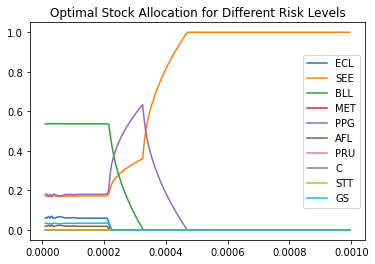

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis_clean = pd.DataFrame.from_dict(param_analysis_clean, orient='index')
param_analysis_clean.columns = [ 'ECL','SEE', 'BLL', 'MET', 'PPG', 'AFL', 'PRU', 'C','STT', 'GS']
param_analysis_clean.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# Unable to run analysis using the value 0.0003 so I'm running an index to see what risk value to use
param_analysis_clean.index[:100]

Float64Index([                 1e-05, 1.5000000000000002e-05,
              2.0000000000000005e-05, 2.5000000000000005e-05,
              3.0000000000000004e-05, 3.5000000000000004e-05,
               4.000000000000001e-05,  4.500000000000001e-05,
               5.000000000000001e-05,  5.500000000000001e-05,
               6.000000000000001e-05,  6.500000000000002e-05,
               7.000000000000002e-05,  7.500000000000002e-05,
               8.000000000000002e-05,  8.500000000000002e-05,
               9.000000000000002e-05,  9.500000000000002e-05,
              0.00010000000000000002, 0.00010500000000000002,
              0.00011000000000000002, 0.00011500000000000003,
              0.00012000000000000003, 0.00012500000000000003,
              0.00013000000000000004, 0.00013500000000000003,
              0.00014000000000000004, 0.00014500000000000003,
              0.00015000000000000004, 0.00015500000000000003,
              0.00016000000000000004, 0.00016500000000000003,
        

In [ ]:
# Once I have the correct risk value, I can run the analysis at approx 0.0003 as labelled on the plot
# This provides the weighting of each stock at that risk level
clean_basket = param_analysis_clean.loc[0.0003000000000000001,:] # Creating a variable to use in analysis section
clean_basket

ECL    0.000001
SEE    0.339408
BLL    0.076728
MET    0.000003
PPG    0.583823
AFL    0.000002
PRU    0.000002
C      0.000003
STT    0.000002
GS     0.000028
Name: 0.0003000000000000001, dtype: float64

## Efficient Frontier



In [ ]:
# Risk vs reward
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[1e-05, 1.5000000000000002e-05, 2.0000000000000005e-05, 2.5000000000000005e-05, 3.0000000000000004e-05, 3.5000000000000004e-05, 4.000000000000001e-05, 4.500000000000001e-05, 5.000000000000001e-05, 5.500000000000001e-05, 6.000000000000001e-05, 6.500000000000002e-05, 7.000000000000002e-05, 7.500000000000002e-05, 8.000000000000002e-05, 8.500000000000002e-05, 9.000000000000002e-05, 9.500000000000002e-05, 0.00010000000000000002, 0.00010500000000000002, 0.00011000000000000002, 0.00011500000000000003, 0.00012000000000000003, 0.00012500000000000003, 0.00013000000000000004, 0.00013500000000000003, 0.00014000000000000004, 0.00014500000000000003, 0.00015000000000000004, 0.00015500000000000003, 0.00016000000000000004, 0.00016500000000000003, 0.00017000000000000004, 0.00017500000000000005, 0.00018000000000000004, 0.00018500000000000005, 0.00019000000000000004, 0.00019500000000000005, 0.00020000000000000004, 0.00020500000000000005, 0.00021000000000000004, 0.00021500000000000005, 0.000220000000000000

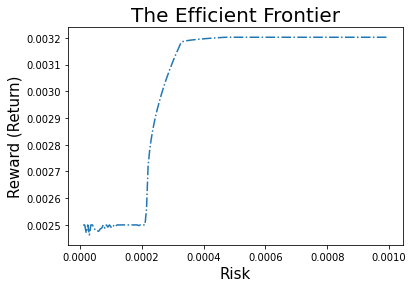

In [ ]:
# Plotting risk vs reward
from pylab import * # Need to import pylab
plot(risk, reward, '-.')
title('The Efficient Frontier', size=20)
xlabel('Risk', size=15)
ylabel('Reward (Return)', size=15)
plt.show()

# Model 2 - Top 10 Dirty Stocks

## Retrieve historical pricing data

In [ ]:
# Assign top 10 dirty stocks to a list
tickers_list = bottomgreen['Symbol'].tolist()
tickers_list

['SYF', 'AMP', 'RJF', 'DFS', 'CFG', 'PKG', 'CINF', 'AIZ', 'CE', 'RF']

In [ ]:
# Pull historical pricing data (05/01/2020 to 12/31/2020) for stocks in our top 10 dirty list
dow_prices = {ticker : si.get_data(ticker,start_date = '05/01/2020',end_date='12/31/2020',interval='1d') for ticker in tickers_list}
dow_prices

{'AIZ':                   open        high         low  ...    adjclose  volume  ticker
 2020-05-01  104.339996  105.419998  101.519997  ...  100.130577  440500     AIZ
 2020-05-04  102.129997  102.290001   98.690002  ...   97.860214  450800     AIZ
 2020-05-05  101.050003  103.660004  101.019997  ...   99.905495  721400     AIZ
 2020-05-06  104.919998  105.500000   97.349998  ...   95.824722  850900     AIZ
 2020-05-07   98.680000  102.529999   98.260002  ...   96.480385  520900     AIZ
 ...                ...         ...         ...  ...         ...     ...     ...
 2020-12-23  131.570007  133.449997  131.570007  ...  131.728012  260600     AIZ
 2020-12-24  132.550003  132.850006  131.850006  ...  131.907043   86700     AIZ
 2020-12-28  132.990005  134.039993  132.500000  ...  132.662964  188300     AIZ
 2020-12-29  133.889999  133.889999  132.009995  ...  131.817535  204500     AIZ
 2020-12-30  132.429993  134.529999  132.429993  ...  133.309464  210900     AIZ
 
 [169 rows x 7 colu

In [ ]:
# Extract just the data we need (adjclose)
# Getting the adjclose price for ticker WRK
prep_data = pd.DataFrame(dow_prices['SYF']['adjclose']).rename(columns = {"adjclose":"SYF"})

In [ ]:
# Combine all 10 tickers
for i in tickers_list[0:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,SYF,AMP,RJF,DFS,CFG,PKG,CINF,AIZ,CE,RF
2020-05-01,18.065084,108.393379,62.064037,40.142197,20.576082,91.928261,59.098125,100.130577,77.962639,9.742455
2020-05-04,17.987007,110.146980,61.415699,40.142197,20.364750,92.927582,58.322433,97.860214,76.517616,9.732876
2020-05-05,17.567345,107.877022,61.661285,39.880211,20.345537,90.696075,57.207375,99.905495,76.684731,9.560443
2020-05-06,16.884169,104.515915,61.405876,37.978378,19.730753,90.696075,51.506031,95.824722,76.262032,9.244315
2020-05-07,17.557583,118.593613,63.291965,39.278614,20.412781,90.996849,53.338600,96.480385,78.984970,9.435909
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,33.922066,187.628204,93.369087,87.964546,34.989391,134.760208,85.214287,131.728012,128.698944,15.822291
2020-12-24,33.753098,188.782593,92.247261,87.884918,34.751904,135.127579,84.737068,131.907043,129.156494,15.832217
2020-12-28,33.743160,189.061234,94.093796,87.884918,34.742012,135.802719,86.864693,132.662964,127.087593,15.842144
2020-12-29,33.723282,188.155655,93.309517,87.616150,34.514423,134.700653,85.731285,131.817535,126.828987,15.633695


In [ ]:
prep_data.shape # Checking my work

(169, 10)

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,SYF,AMP,RJF,DFS,CFG,PKG,CINF,AIZ,CE,RF
2020-05-04,-0.004322,0.016178,-0.010446,0.000000,-0.010271,0.010871,-0.013125,-0.022674,-0.018535,-0.000983
2020-05-05,-0.023331,-0.020608,0.003999,-0.006526,-0.000943,-0.024013,-0.019119,0.020900,0.002184,-0.017717
2020-05-06,-0.038889,-0.031157,-0.004142,-0.047689,-0.030217,0.000000,-0.099661,-0.040846,-0.005512,-0.033066
2020-05-07,0.039884,0.134694,0.030715,0.034236,0.034567,0.003316,0.035580,0.006842,0.035705,0.020726
2020-05-08,0.035019,0.031874,0.037250,0.055336,0.044706,0.046380,0.013089,0.002130,0.029496,0.047716
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.026158,0.018805,0.003307,0.017619,0.032710,0.014349,0.020843,0.007225,-0.006298,0.033052
2020-12-24,-0.004981,0.006153,-0.012015,-0.000905,-0.006787,0.002726,-0.005600,0.001359,0.003555,0.000627
2020-12-28,-0.000294,0.001476,0.020017,0.000000,-0.000285,0.004996,0.025109,0.005731,-0.016019,0.000627
2020-12-29,-0.000589,-0.004790,-0.008335,-0.003058,-0.006551,-0.008115,-0.013048,-0.006373,-0.002035,-0.013158


## Create dataframe of returns using daily % change

This will be comprised of the daily percentage change between the stock's previous and current day's closing price.

In [ ]:
# Use pct_change as the return metric for the stock
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
  
# drop records with NA
return_data.dropna(inplace=True)
return_data

,SYF,AMP,RJF,DFS,CFG,PKG,CINF,AIZ,CE,RF
2020-05-04,-0.004322,0.016178,-0.010446,0.000000,-0.010271,0.010871,-0.013125,-0.022674,-0.018535,-0.000983
2020-05-05,-0.023331,-0.020608,0.003999,-0.006526,-0.000943,-0.024013,-0.019119,0.020900,0.002184,-0.017717
2020-05-06,-0.038889,-0.031157,-0.004142,-0.047689,-0.030217,0.000000,-0.099661,-0.040846,-0.005512,-0.033066
2020-05-07,0.039884,0.134694,0.030715,0.034236,0.034567,0.003316,0.035580,0.006842,0.035705,0.020726
2020-05-08,0.035019,0.031874,0.037250,0.055336,0.044706,0.046380,0.013089,0.002130,0.029496,0.047716
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,0.026158,0.018805,0.003307,0.017619,0.032710,0.014349,0.020843,0.007225,-0.006298,0.033052
2020-12-24,-0.004981,0.006153,-0.012015,-0.000905,-0.006787,0.002726,-0.005600,0.001359,0.003555,0.000627
2020-12-28,-0.000294,0.001476,0.020017,0.000000,-0.000285,0.004996,0.025109,0.005731,-0.016019,0.000627
2020-12-29,-0.000589,-0.004790,-0.008335,-0.003058,-0.006551,-0.008115,-0.013048,-0.006373,-0.002035,-0.013158


## Create a dataframe with the mean and standard deviation of each stock's returns

In [ ]:
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
SYF     0.004321
AMP     0.003679
RJF     0.002767
DFS     0.005370
CFG     0.003825
PKG     0.002569
CINF    0.002673
AIZ     0.001937
CE      0.003257
RF      0.003486
      Std_Dev_Return
SYF         0.032877
AMP         0.025467
RJF         0.025425
DFS         0.035611
CFG         0.036408
PKG         0.020695
CINF        0.029757
AIZ         0.021736
CE          0.022813
RF          0.034874


## Create a covariance matrix

Our covariance matrix will show whether the individual stock returns generally rise or decline together as well as the strength of that relationship.

In [ ]:
# Covariance matrix based on the stock returns
Covariance_matrix = return_data.cov()
Covariance_matrix

,SYF,AMP,RJF,DFS,CFG,PKG,CINF,AIZ,CE,RF
SYF,0.001087,0.000693,0.000705,0.001105,0.001010,0.000470,0.000666,0.000446,0.000578,0.000985
AMP,0.000693,0.000652,0.000523,0.000730,0.000738,0.000325,0.000503,0.000336,0.000446,0.000705
RJF,0.000705,0.000523,0.000650,0.000765,0.000803,0.000374,0.000512,0.000359,0.000442,0.000784
DFS,0.001105,0.000730,0.000765,0.001276,0.001102,0.000521,0.000658,0.000475,0.000622,0.001089
CFG,0.001010,0.000738,0.000803,0.001102,0.001333,0.000515,0.000720,0.000491,0.000632,0.001207
PKG,0.000470,0.000325,0.000374,0.000521,0.000515,0.000431,0.000357,0.000232,0.000330,0.000491
CINF,0.000666,0.000503,0.000512,0.000658,0.000720,0.000357,0.000891,0.000382,0.000399,0.000680
AIZ,0.000446,0.000336,0.000359,0.000475,0.000491,0.000232,0.000382,0.000475,0.000314,0.000485
CE,0.000578,0.000446,0.000442,0.000622,0.000632,0.000330,0.000399,0.000314,0.000524,0.000607
RF,0.000985,0.000705,0.000784,0.001089,0.001207,0.000491,0.000680,0.000485,0.000607,0.001224


## Create a covariance matrix dataframe

In [ ]:
# Creating covariance dataframe from matrix 
df_cov = Covariance_matrix
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# Printing the average returns
df_return = return_data.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           SYF       AMP       RJF  ...       AIZ        CE        RF
SYF   0.001087  0.000693  0.000705  ...  0.000446  0.000578  0.000985
AMP   0.000693  0.000652  0.000523  ...  0.000336  0.000446  0.000705
RJF   0.000705  0.000523  0.000650  ...  0.000359  0.000442  0.000784
DFS   0.001105  0.000730  0.000765  ...  0.000475  0.000622  0.001089
CFG   0.001010  0.000738  0.000803  ...  0.000491  0.000632  0.001207
PKG   0.000470  0.000325  0.000374  ...  0.000232  0.000330  0.000491
CINF  0.000666  0.000503  0.000512  ...  0.000382  0.000399  0.000680
AIZ   0.000446  0.000336  0.000359  ...  0.000475  0.000314  0.000485
CE    0.000578  0.000446  0.000442  ...  0.000314  0.000524  0.000607
RF    0.000985  0.000705  0.000784  ...  0.000485  0.000607  0.001224

[10 rows x 10 columns]


Average Return:
SYF     0.004321
AMP     0.003679
RJF     0.002767
DFS     0.005370
CFG     0.003825
PKG     0.002569
CINF    0.002673
AIZ     0.001937
CE      0.003257
RF      0.003486

## Build the Model

### Define a concrete model optimization 

In [ ]:
# Defining a concrete model optimization 
m = ConcreteModel()

### Declare the decision variables

In [ ]:
# defining the variables and bind them between o and 1
m.SYF = Var(within=NonNegativeReals, bounds=(0,1))
m.AMP = Var(within=NonNegativeReals, bounds=(0,1))
m.RJF = Var(within=NonNegativeReals, bounds=(0,1))
m.DFS = Var(within=NonNegativeReals, bounds=(0,1))
m.CFG = Var(within=NonNegativeReals, bounds=(0,1))
m.PKG = Var(within=NonNegativeReals, bounds=(0,1))
m.CINF = Var(within=NonNegativeReals, bounds=(0,1))
m.AIZ = Var(within=NonNegativeReals, bounds=(0,1))
m.CE = Var(within=NonNegativeReals, bounds=(0,1))
m.RF = Var(within=NonNegativeReals, bounds=(0,1))

### Declare the objective function

In [ ]:
# Declare objective
m.objective = Objective(expr =               
                        m.SYF*df_return[0] + 
                        m.AMP*df_return[1]+
                        m.RJF*df_return[2] +
                        m.DFS*df_return[3] + 
                        m.CFG*df_return[4] + 
                        m.PKG*df_return[5]+
                        m.CINF*df_return[6] +
                        m.AIZ*df_return[7] + 
                        m.CE*df_return[8] + 
                        m.RF*df_return[9],
                        sense=maximize) # maximizing returns

### Declare the constraints

In [ ]:
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.SYF + m.AMP + m.RJF + m.DFS + m.CFG + m.PKG + m.CINF + m.AIZ + m.CE + m.RF == 1)

# 2. Minimum return should be 0.0025 since returns are based on daily % change
m.return_floor = Constraint(expr = m.objective >= 0.0025)

In [ ]:
# Creating calculations table to calculate the risk
# 3. Max risk should be less than 0.001
max_risk = 0.001
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking
  proportions = [ m.SYF, m.AMP, m.RJF, m.DFS, m.CFG, m.PKG, m.CINF,m.AIZ, m.CE, m.RF]
  risk_matrix = [] # an empty list
  
  # Iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 10 stocks, there are 10*10 = 100 elements
  # sum these 100 elements up at the end and that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# Defining risk limits
risk_limits = np.arange(0.00001, 0.001, 0.000005) # small increments
risk_limits

array([1.00e-05, 1.50e-05, 2.00e-05, 2.50e-05, 3.00e-05, 3.50e-05,
       4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05, 6.00e-05, 6.50e-05,
       7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05, 9.00e-05, 9.50e-05,
       1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04, 1.20e-04, 1.25e-04,
       1.30e-04, 1.35e-04, 1.40e-04, 1.45e-04, 1.50e-04, 1.55e-04,
       1.60e-04, 1.65e-04, 1.70e-04, 1.75e-04, 1.80e-04, 1.85e-04,
       1.90e-04, 1.95e-04, 2.00e-04, 2.05e-04, 2.10e-04, 2.15e-04,
       2.20e-04, 2.25e-04, 2.30e-04, 2.35e-04, 2.40e-04, 2.45e-04,
       2.50e-04, 2.55e-04, 2.60e-04, 2.65e-04, 2.70e-04, 2.75e-04,
       2.80e-04, 2.85e-04, 2.90e-04, 2.95e-04, 3.00e-04, 3.05e-04,
       3.10e-04, 3.15e-04, 3.20e-04, 3.25e-04, 3.30e-04, 3.35e-04,
       3.40e-04, 3.45e-04, 3.50e-04, 3.55e-04, 3.60e-04, 3.65e-04,
       3.70e-04, 3.75e-04, 3.80e-04, 3.85e-04, 3.90e-04, 3.95e-04,
       4.00e-04, 4.05e-04, 4.10e-04, 4.15e-04, 4.20e-04, 4.25e-04,
       4.30e-04, 4.35e-04, 4.40e-04, 4.45e-04, 4.50e-04, 4.55e

## Run the model

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.SYF(), m.AMP(), m.RJF(), m.DFS(), m.CFG(), m.PKG(), m.CINF(),m.AIZ(), m.CE(), m.RF()]
  # store our returns
  returns[r] =  m.SYF()*df_return[0] + m.AMP()*df_return[1] + m.RJF()*df_return[2] + m.DFS()*df_return[3] + m.CFG()*df_return[4] + m.PKG()*df_return[5] + m.CINF()*df_return[6] + m.AIZ()*df_return[7] + m.CE()*df_return[8]+ m.RF()*df_return[9]

Streaming output truncated to the last 5000 lines.
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time: 0.03551959991455078
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
    'pyomo.core.base.constraint.SimpleConstraint'>) on block unknown with a
    new Component (type=<class
    'pyomo.core.base.constraint.AbstractSimpleConstraint'>). This is usually
    indicative of a modelling error. To avoid this warning, use
    block.del_component() and block.add_component().
    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a loca

## Parameter Analysis

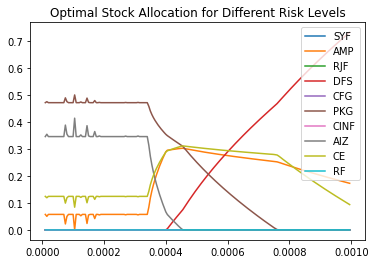

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = [ 'SYF','AMP', 'RJF', 'DFS', 'CFG', 'PKG', 'CINF','AIZ', 'CE', 'RF']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

In [ ]:
# Unable to run analysis using 0.0003 so I'm running an index to see what risk value to use
param_analysis.index[:100]

Float64Index([                 1e-05, 1.5000000000000002e-05,
              2.0000000000000005e-05, 2.5000000000000005e-05,
              3.0000000000000004e-05, 3.5000000000000004e-05,
               4.000000000000001e-05,  4.500000000000001e-05,
               5.000000000000001e-05,  5.500000000000001e-05,
               6.000000000000001e-05,  6.500000000000002e-05,
               7.000000000000002e-05,  7.500000000000002e-05,
               8.000000000000002e-05,  8.500000000000002e-05,
               9.000000000000002e-05,  9.500000000000002e-05,
              0.00010000000000000002, 0.00010500000000000002,
              0.00011000000000000002, 0.00011500000000000003,
              0.00012000000000000003, 0.00012500000000000003,
              0.00013000000000000004, 0.00013500000000000003,
              0.00014000000000000004, 0.00014500000000000003,
              0.00015000000000000004, 0.00015500000000000003,
              0.00016000000000000004, 0.00016500000000000003,
        

In [ ]:
# Once I have the correct risk value, I can run the analysis at approx 0.0003 as labelled on the plot
# This provides the weighting of each stock at that risk level
dirty_basket = param_analysis.loc[0.0003000000000000001,:] # Creating a variable to use in analysis section
dirty_basket

SYF     0.000000e+00
AMP     5.755003e-02
RJF     1.666136e-09
DFS     0.000000e+00
CFG     0.000000e+00
PKG     4.719048e-01
CINF    3.476176e-09
AIZ     3.461610e-01
CE      1.243842e-01
RF      0.000000e+00
Name: 0.0003000000000000001, dtype: float64

## Efficient Frontier

In [ ]:
# Risk vs reward
risk_dirty = list(returns.keys()) # coerce dict_keys to a list
print(risk_dirty)
reward_dirty = list(returns.values()) # coerce dict_values to a list
print(reward_dirty) # we aren't allowed to name our value 'return' - this is a reserved name.

[1e-05, 1.5000000000000002e-05, 2.0000000000000005e-05, 2.5000000000000005e-05, 3.0000000000000004e-05, 3.5000000000000004e-05, 4.000000000000001e-05, 4.500000000000001e-05, 5.000000000000001e-05, 5.500000000000001e-05, 6.000000000000001e-05, 6.500000000000002e-05, 7.000000000000002e-05, 7.500000000000002e-05, 8.000000000000002e-05, 8.500000000000002e-05, 9.000000000000002e-05, 9.500000000000002e-05, 0.00010000000000000002, 0.00010500000000000002, 0.00011000000000000002, 0.00011500000000000003, 0.00012000000000000003, 0.00012500000000000003, 0.00013000000000000004, 0.00013500000000000003, 0.00014000000000000004, 0.00014500000000000003, 0.00015000000000000004, 0.00015500000000000003, 0.00016000000000000004, 0.00016500000000000003, 0.00017000000000000004, 0.00017500000000000005, 0.00018000000000000004, 0.00018500000000000005, 0.00019000000000000004, 0.00019500000000000005, 0.00020000000000000004, 0.00020500000000000005, 0.00021000000000000004, 0.00021500000000000005, 0.000220000000000000

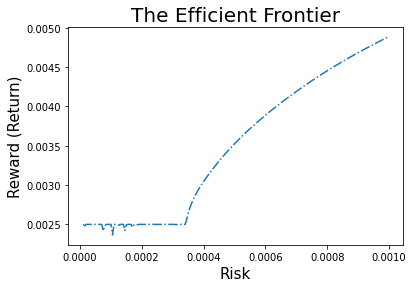

In [ ]:
# Plotting risk vs reward
from pylab import * # Need to import pylab
plot(risk_dirty, reward_dirty, '-.')
title('The Efficient Frontier', size=20)
xlabel('Risk', size=15)
ylabel('Reward (Return)', size=15)
plt.show()

# Analysis

##First bullet point

Look at the efficient frontier and select ONE risk level for your models. Use the same risk level for analyzing both models.

In [ ]:
# Combining the risk and reward for top dirty and green stocks into 1 dataframe
df_risk_dirty = pd.DataFrame(risk_dirty)
df_reward_dirty = pd.DataFrame(reward_dirty)
df_reward = pd.DataFrame(reward)
risk_reward = pd.concat([df_risk_dirty, df_reward_dirty, df_reward], axis=1)

# Adding column labels
risk_reward.columns=['Risk_Level', 'Return_Dirty', 'Return_Clean']

# Using risk level of 0.00095
risk_level = risk_reward[risk_reward['Risk_Level']== 0.0009500000000000002]
print (risk_level)

     Risk_Level  Return_Dirty  Return_Clean
188     0.00095      0.004789      0.003202


### ***First bullet point analysis breakdown***

At the 0.00095 risk level, dirty stocks return 0.004789 and clean stocks return 0.003202

## Second bullet point

For each of your models, create a table that shows the price of your stocks on Jan 1, 2021 (when you would have done your allocation) and March 1, 2021 (when we imagine you cashed out) that comes from that risk level

### ***Second bullet point analysis breakdown***

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;During this analysis, we will retrieve the stock prices for our top green and top dirty stocks for January 1, 2021 and March 1, 2021.  Once we have those prices we will layer in our stock baskets which is comprised of the proportion of each stock in the basket.  
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Once the stock prices and proportions are in hand, we will multiply the stock prices and proportions to derive a starting value on January 1 and an ending value on March 1.  
<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The comparison of those 2 values will determine the efficacy of our models.

### ***Top Green Stocks Analysis:***

#### Retrieve historical prices for top 10 green stocks on 1/1/2021 and 3/1/2021

In [ ]:
# Assign top 10 green stocks to a list
tickers_list = topgreen['Symbol'].tolist()
tickers_list

# Pull historical pricing data (01/01/2021 to 3/31/2021) for stocks in our top 10 list
dow_prices_clean = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='3/31/2021',interval='1mo') for ticker in tickers_list}
dow_prices_clean

{'AFL':                  open       high        low  ...   adjclose    volume  ticker
 2021-01-01  44.599998  47.330002  42.959999  ...  44.862240  70797300     AFL
 2021-02-01  45.389999  50.150002  44.860001  ...  47.553177  77694500     AFL
 2021-03-01  48.669998  52.779999  47.700001  ...  51.180000  88895700     AFL
 
 [3 rows x 7 columns],
 'BLL':                  open       high        low  ...   adjclose    volume  ticker
 2021-01-01  91.730003  93.000000  85.150002  ...  87.866936  32970200     BLL
 2021-02-01  88.699997  91.660004  85.250000  ...  85.241516  32169500     BLL
 2021-03-01  85.330002  87.309998  80.739998  ...  84.739998  54593900     BLL
 
 [3 rows x 7 columns],
 'C':                  open       high        low  ...   adjclose     volume  ticker
 2021-01-01  61.590000  69.430000  57.689999  ...  57.499863  455928000       C
 2021-02-01  58.660000  69.379997  57.400002  ...  65.879997  342544200       C
 2021-03-01  68.489998  76.129997  67.889999  ...  72.75000

In [ ]:
# Extract just the data we need (adjclose) for Jan and March
# Getting the adjclose price for ticker AFL and the rest
prep_data_clean = pd.DataFrame(dow_prices_clean['AFL']['adjclose']).rename(columns = {"adjclose":"AFL"})

In [ ]:
# Combine all 10 tickers
for i in tickers_list[0:]:
  prep_data_clean[i] = pd.DataFrame(dow_prices_clean[i]['adjclose'])
prep_data_clean

,AFL,ECL,SEE,BLL,MET,PPG,PRU,C,STT,GS
2021-01-01,44.862240,204.052811,42.116501,87.866936,47.701370,134.177475,77.173126,57.499863,69.578262,270.109039
2021-02-01,47.553177,208.891983,41.747845,85.241516,57.063316,134.287048,85.493782,65.879997,72.331573,318.230011
2021-03-01,51.180000,213.591461,45.653610,84.739998,60.790001,150.259995,91.099998,72.750000,83.503860,325.720581


In [ ]:
# Getting rid of February data
clean_price_jan_march = prep_data_clean.iloc[[0,2],:]
clean_price_jan_march

,AFL,ECL,SEE,BLL,MET,PPG,PRU,C,STT,GS
2021-01-01,44.86224,204.052811,42.116501,87.866936,47.701370,134.177475,77.173126,57.499863,69.578262,270.109039
2021-03-01,51.18000,213.591461,45.653610,84.739998,60.790001,150.259995,91.099998,72.750000,83.503860,325.720581


#### Retrieve basket of green stock proportions with a 0.0003 risk level

In [ ]:
# Convert clean basket to dataframe
clean_basket_df = pd.DataFrame(clean_basket)

In [ ]:
# make the ticker (index) as a column
clean_basket_df.reset_index(inplace=True)

In [ ]:
# rename the columns
clean_basket_df.columns=['ticker','weight']

In [ ]:
clean_basket_df

,ticker,weight
0,ECL,0.000001
1,SEE,0.339408
2,BLL,0.076728
3,MET,0.000003
4,PPG,0.583823
5,AFL,0.000002
6,PRU,0.000002
7,C,0.000003
8,STT,0.000002
9,GS,0.000028


In [ ]:
# Do the math: Multiply the weighting (from clean basket table) by the prices (from prices table) using the ticker
green_value = clean_price_jan_march.mul(clean_basket_df.set_index('ticker').weight)

In [ ]:
# Vertical view
clean_jan_march = green_value.transpose().reset_index()

In [ ]:
# Listing of ticker, stock value on Jan 1 and stock value on March 1
clean_jan_march

,index,2021-01-01 00:00:00,2021-03-01 00:00:00
0,AFL,0.000076,0.000087
1,BLL,6.741892,6.501967
2,C,0.000147,0.000186
3,ECL,0.000289,0.000302
4,GS,0.007665,0.009243
5,MET,0.000125,0.000159
6,PPG,78.335862,87.725202
7,PRU,0.000161,0.000190
8,SEE,14.294698,15.495223
9,STT,0.000111,0.000133


In [ ]:
# Cleaning up the column names
clean_jan_march.columns = ['ticker','Stock Value Jan','Stock Value March']

In [ ]:
clean_jan_march

,ticker,Stock Value Jan,Stock Value March
0,AFL,0.000076,0.000087
1,BLL,6.741892,6.501967
2,C,0.000147,0.000186
3,ECL,0.000289,0.000302
4,GS,0.007665,0.009243
5,MET,0.000125,0.000159
6,PPG,78.335862,87.725202
7,PRU,0.000161,0.000190
8,SEE,14.294698,15.495223
9,STT,0.000111,0.000133


In [ ]:
# Value of portfolio of top green stocks on Jan 1
clean_jan_march[['Stock Value Jan']].sum()

Stock Value Jan    99.381025
dtype: float64

In [ ]:
# Value of portfolio of top green stocks on March 1
clean_jan_march[['Stock Value March']].sum()

Stock Value March    109.732692
dtype: float64

### ***Conclusion top green stocks***

The value of our stock portfolio of the top 10 green stocks on January 1, 2021 is 99.381025.  After 2 months, our portfolio has increased in value by approximately 10% to 109.732692.

### ***Top Dirty Stocks Analysis:***

#### Retrieve historical prices for top 10 dirty stocks on 1/1/2021 and 3/1/2021

In [ ]:
# Assign top 10 dirty stocks to a list
tickers_list = bottomgreen['Symbol'].tolist()
tickers_list

# Pull historical pricing data (01/01/2021 to 3/31/2021) for stocks in our top 10 list
dow_prices_dirty = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='3/31/2021',interval='1mo') for ticker in tickers_list}
dow_prices_dirty

{'AIZ':                   open        high         low  ...    adjclose    volume  ticker
 2021-01-01  136.210007  143.669998  128.000000  ...  134.741730   6773600     AIZ
 2021-02-01  135.830002  136.289993  121.550003  ...  122.557579  13112800     AIZ
 2021-03-01  124.430000  144.929993  124.430000  ...  141.770004  11448000     AIZ
 
 [3 rows x 7 columns],
 'AMP':                   open        high         low  ...    adjclose    volume  ticker
 2021-01-01  195.300003  214.500000  185.710007  ...  196.913086  12807700     AMP
 2021-02-01  199.820007  233.910004  196.770004  ...  220.170074  12228000     AMP
 2021-03-01  224.979996  236.440002  213.380005  ...  232.449997  21772900     AMP
 
 [3 rows x 7 columns],
 'CE':                   open        high         low  ...    adjclose    volume  ticker
 2021-01-01  130.860001  140.089996  115.419998  ...  121.497612  18378800      CE
 2021-02-01  123.639999  142.699997  120.930000  ...  138.168106  16352300      CE
 2021-03-01  141.

In [ ]:
# Extract just the data we need (adjclose) for Jan and March
# Getting the adjclose price for ticker AFL and the rest
prep_data_dirty = pd.DataFrame(dow_prices_dirty['AIZ']['adjclose']).rename(columns = {"adjclose":"AIZ"})

In [ ]:
# Combine all 10 tickers
for i in tickers_list[0:]:
  prep_data_dirty[i] = pd.DataFrame(dow_prices_dirty[i]['adjclose'])
prep_data_dirty

,AIZ,SYF,AMP,RJF,DFS,CFG,PKG,CINF,CE,RF
2021-01-01,134.741730,33.444988,196.913086,99.206512,83.156708,36.058067,133.499298,83.603661,121.497612,16.884390
2021-02-01,122.557579,38.444344,220.170074,116.369186,93.638397,42.984703,131.076736,97.303963,138.168106,20.477657
2021-03-01,141.770004,40.660000,232.449997,122.170700,94.989998,44.150002,133.519150,102.493767,149.809998,20.507437


In [ ]:
# Getting rid of February data
dirty_price_jan_march = prep_data_dirty.iloc[[0,2],:]
dirty_price_jan_march

,AIZ,SYF,AMP,RJF,DFS,CFG,PKG,CINF,CE,RF
2021-01-01,134.741730,33.444988,196.913086,99.206512,83.156708,36.058067,133.499298,83.603661,121.497612,16.884390
2021-03-01,141.770004,40.660000,232.449997,122.170700,94.989998,44.150002,133.519150,102.493767,149.809998,20.507437


#### Retrieve basket of dirty stock proportions with a 0.0003 risk level

In [ ]:
dirty_basket

SYF     0.000000e+00
AMP     5.755003e-02
RJF     1.666136e-09
DFS     0.000000e+00
CFG     0.000000e+00
PKG     4.719048e-01
CINF    3.476176e-09
AIZ     3.461610e-01
CE      1.243842e-01
RF      0.000000e+00
Name: 0.0003000000000000001, dtype: float64

In [ ]:
# Convert dirty basket to dataframe
dirty_basket_df = pd.DataFrame(dirty_basket)

In [ ]:
# make the ticker (index) as a column
dirty_basket_df.reset_index(inplace=True)

In [ ]:
# rename the columns
dirty_basket_df.columns=['ticker','weight']

In [ ]:
dirty_basket_df

,ticker,weight
0,SYF,0.000000e+00
1,AMP,5.755003e-02
2,RJF,1.666136e-09
3,DFS,0.000000e+00
4,CFG,0.000000e+00
5,PKG,4.719048e-01
6,CINF,3.476176e-09
7,AIZ,3.461610e-01
8,CE,1.243842e-01
9,RF,0.000000e+00


In [ ]:
# Do the math: Multiply the weighting (from clean basket table) by the prices (from prices table) using the ticker
dirty_value = dirty_price_jan_march.mul(dirty_basket_df.set_index('ticker').weight)

In [ ]:
# Vertical view
dirty_jan_march = dirty_value.transpose().reset_index()

In [ ]:
# Listing of ticker, stock value on Jan 1 and stock value on March 1
dirty_jan_march

,index,2021-01-01 00:00:00,2021-03-01 00:00:00
0,AIZ,4.664233e+01,4.907524e+01
1,AMP,1.133235e+01,1.337751e+01
2,CE,1.511239e+01,1.863400e+01
3,CFG,0.000000e+00,0.000000e+00
4,CINF,2.906210e-07,3.562864e-07
5,DFS,0.000000e+00,0.000000e+00
6,PKG,6.299896e+01,6.300833e+01
7,RF,0.000000e+00,0.000000e+00
8,RJF,1.652915e-07,2.035530e-07
9,SYF,0.000000e+00,0.000000e+00


In [ ]:
# Cleaning up the column names
dirty_jan_march.columns = ['ticker','Stock Value Jan','Stock Value March']

In [ ]:
dirty_jan_march

,ticker,Stock Value Jan,Stock Value March
0,AIZ,4.664233e+01,4.907524e+01
1,AMP,1.133235e+01,1.337751e+01
2,CE,1.511239e+01,1.863400e+01
3,CFG,0.000000e+00,0.000000e+00
4,CINF,2.906210e-07,3.562864e-07
5,DFS,0.000000e+00,0.000000e+00
6,PKG,6.299896e+01,6.300833e+01
7,RF,0.000000e+00,0.000000e+00
8,RJF,1.652915e-07,2.035530e-07
9,SYF,0.000000e+00,0.000000e+00


In [ ]:
# Value of portfolio of top dirty stocks on Jan 1
dirty_jan_march[['Stock Value Jan']].sum()

Stock Value Jan    136.086028
dtype: float64

In [ ]:
# Value of portfolio of top dirty stocks on March 1
dirty_jan_march[['Stock Value March']].sum()

Stock Value March    144.095075
dtype: float64

### ***Conclusion top dirty stocks***

The value of our stock portfolio of the top 10 dirty stocks on January 1, 2021 is 136.086028.  After 2 months, our portfolio has increased in value by approximately 6% to 144.095075.

# Conclusions:

* If you invested in the top 10 green stocks from the Materials and Financial sectors on January 1, 2021 and sold on March 1, 2021, your investment would have earned about 10%.  However, had you invested in the top 10 dirty stocks from the Materials and Financial sectors on January 1, 2021 and sold on March 1, 2021, your investment would have earned about 6%.  Therefore the top 10 green stocks from those sectors outperformed the top 10 dirty stocks by 4%.
* Though we compared a portfolio of green stocks and dirty stocks across 2 financials sectors, once the code was in place, it was easy to see how the model can easily scale to consume more time series data further validating the results.

* The model can easily scale across more sectors should you want to validate a thesis concerning the performance of green vs. dirty stocks.

*  We were surprised to learn the wealth of historical stock data that is freely available for analysis.

*  While looking for a Seaborn plot, we came across many interesting visualizations such as a violin plot and the categorical scatterplot we utilized.

* Greenscore has a correlation with stock value

* Investing in a top green or top dirty stock in the financial and materials sector provides value

* Green stock perform better than dirty stock in the first quearter of the year




